**Optimizing Public Amenities in the City of Melbourne**

**Authored by**: Liny Jose Alias

**Duration**: 90 mins

**Level**: Intermediate

**Pre-requisite Skills**: Python, Data Visualization, Data Wrangling, Machine Learning Models,Deep Learning

**Scenario**
As a regular pedestrian, I would like to know the location of public amenities like the nearest drinking fountain and public toilets in the city of Melbourne.

***Project Objective, Overview & Research***

This usecase aims  to optimize the allocation and availability of public amenities in the City of Melbourne, focusing on public toilets and drinking fountains. Using pedestrian traffic data from the Pedestrian Counting System, the aim is to identify high-demand areas that lack sufficient public amenities and suggest new locations for improvements. This project will assist city planners in ensuring that services are equitably distributed and aligned with public needs.

**Dataset 1:**
https://data.melbourne.vic.gov.au/explore/dataset/drinking-fountains/information/
This dataset holds the description, type and geographical location of all drinking fountains in the City of Melbourne

**Dataset 2:**
https://data.melbourne.vic.gov.au/explore/dataset/public-toilets/information/
Public toilets known about or operated by the council. 

**Dataset 3:**
https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
This dataset contains hourly pedestrian counts since 2009 from pedestrian sensor devices located across the city. The data is updated on a monthly basis and can be used to determine variations in pedestrian activity throughout the day.


In [2]:
#Importing core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder

Loading the datasets through API

In [4]:
import requests
import pandas as pd
from io import StringIO

# Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        # Try to determine the delimiter by reading the first few lines
        delimiter = ','
        sample_lines = url_content.split('\n')[:5]
        for line in sample_lines:
            if ';' in line:
                delimiter = ';'
                break
        df = pd.read_csv(StringIO(url_content), delimiter=delimiter)
        print(f'Successfully retrieved dataset: {dataset_id}')
        return df
    else:
        print(f'Request failed with status code {response.status_code}')
        return None

# Dataset IDs
dataset_ids = {
    'drinking_fountain': 'drinking-fountains',
    'public_toilets': 'public-toilets',
    'pedestrian_count': 'pedestrian-counting-system-monthly-counts-per-hour'
    
}

# Retrieving and printing data for each dataset
datasets = {}
for name, dataset_id in dataset_ids.items():
    print(f"\nRetrieving data for {name}...")
    df = collect_data(dataset_id)
    if df is not None:
        datasets[name] = df
        print(f"The {name} dataset contains {len(df)} records.")
        print(df.head(5))
    else:
        print(f"Unable to retrieve the {name} dataset.")

# Creating dataframes
drinking_df = datasets.get('drinking_fountain')
toilets_df = datasets.get('public_toilets')
pedestrian_df = datasets.get('pedestrian_count')


Retrieving data for drinking_fountain...
Successfully retrieved dataset: drinking-fountains
The drinking_fountain dataset contains 302 records.
                                         description  \
0  Drinking Fountain - Stainless Steel Drinking F...   
1  Drinking Fountain - Leaf Type - With Bottle Re...   
2  Drinking Fountain - Leaf Type - Dog Bowl  - Un...   
3  Drinking Fountain - Leaf Type - Dog Bowl  - JJ...   
4  Drinking Fountain - Leaf Type - Dog Bowl  - Pr...   

                             co_ordinates        lat         lon  
0  -37.82210994675337, 144.93666205920204 -37.822110  144.936662  
1  -37.81043106640399, 144.95558395492208 -37.810431  144.955584  
2  -37.80089398503696, 144.96074870882546 -37.800894  144.960749  
3  -37.79841970759794, 144.92421993826414 -37.798420  144.924220  
4   -37.7914165845557, 144.96125460876374 -37.791417  144.961255  

Retrieving data for public_toilets...
Successfully retrieved dataset: public-toilets
The public_toilets dataset con

Viewing the datasets

In [6]:
#Displaying the first 5 rows of the dataframe
drinking_df.head()

description  \
0  Drinking Fountain - Stainless Steel Drinking F...   
1  Drinking Fountain - Leaf Type - With Bottle Re...   
2  Drinking Fountain - Leaf Type - Dog Bowl  - Un...   
3  Drinking Fountain - Leaf Type - Dog Bowl  - JJ...   
4  Drinking Fountain - Leaf Type - Dog Bowl  - Pr...   

                             co_ordinates        lat         lon  
0  -37.82210994675337, 144.93666205920204 -37.822110  144.936662  
1  -37.81043106640399, 144.95558395492208 -37.810431  144.955584  
2  -37.80089398503696, 144.96074870882546 -37.800894  144.960749  
3  -37.79841970759794, 144.92421993826414 -37.798420  144.924220  
4   -37.7914165845557, 144.96125460876374 -37.791417  144.961255

In [7]:
#Displaying the first 5 rows of the dataframe
toilets_df.head()

name female male wheelchair  \
0  Public Toilet - Queen Victoria Market (153 Vic...    yes  yes         no   
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...     no  yes         no   
2  Public Toilet - Toilet 6 - Elizabeth Street (T...    yes   no         no   
3  Public Toilet - Toilet 142 - Queensberry Stree...     no  yes         no   
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...    yes  yes        yes   

            operator baby_facil        lat         lon  \
0  City of Melbourne         no -37.806121  144.956538   
1  City of Melbourne         no -37.819796  144.937665   
2  City of Melbourne         no -37.813838  144.963097   
3  City of Melbourne         no -37.804640  144.962850   
4  City of Melbourne         no -37.818924  144.934239   

                                  location  
0  -37.806121499077804, 144.95653844268273  
1  -37.819795975740334, 144.93766540530564  
2   -37.81383779217631, 144.96309721024045  
3   -37.80463970714722, 144.96285021945613  
4   -37.818924455699296, 144.9342385117904

In [8]:
#Displaying the first 5 rows of the dataframe
pedestrian_df.head()

id  location_id sensing_date  hourday  direction_1  direction_2  \
0   63720220831           63   2022-08-31        7           64           70   
1  532320240501           53   2024-05-01       23           21           36   
2  712020220312           71   2022-03-12       20           11           10   
3  241120210905           24   2021-09-05       11           96          115   
4   39720220914           39   2022-09-14        7           92           55   

   pedestriancount sensor_name                    location  
0              134    Bou231_T  -37.81333081, 144.96675571  
1               57    Col254_T    -37.81564191, 144.965499  
2               21    WestWP_T  -37.81235775, 144.97136962  
3              211    Col620_T  -37.81887963, 144.95449198  
4              147     AlfPl_T  -37.81379749, 144.96995745

Now we are going to do some Data Wrangling process to make it ready for analysis and run predictive models.

Removing unneccessary columns

In [11]:
toilets_df = toilets_df.drop(['operator', 'baby_facil'], axis=1)

Checking for Missing values

In [13]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",drinking_df.isnull().sum())

Null values in individual columns
 description     0
co_ordinates    0
lat             0
lon             0
dtype: int64


In [14]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",toilets_df.isnull().sum())

Null values in individual columns
 name          0
female        1
male          1
wheelchair    1
lat           0
lon           0
location      0
dtype: int64


In [15]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",pedestrian_df.isnull().sum())

Null values in individual columns
 id                 0
location_id        0
sensing_date       0
hourday            0
direction_1        0
direction_2        0
pedestriancount    0
sensor_name        0
location           0
dtype: int64


Handling missing values

In [17]:
# Drop rows with NaN values
toilets_df_cleaned = toilets_df.dropna()

# Print the number of null values after dropping
print("\nNull values after dropping:")
print(toilets_df_cleaned.isnull().sum())

# Print the total number of rows after dropping
print(f"\nTotal number of rows after dropping: {len(toilets_df_cleaned)}")

# Calculate and print the number and percentage of rows dropped
rows_dropped = len(toilets_df) - len(toilets_df_cleaned)
percentage_dropped = (rows_dropped / len(toilets_df)) * 100

print(f"\nNumber of rows dropped: {rows_dropped}")
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

# Verify the changes
print("\nFirst few rows of the cleaned dataset:")
print(toilets_df_cleaned.head())

#Reassigning the cleaned dataframe back to toilets_df
toilets_df = toilets_df_cleaned


Null values after dropping:
name          0
female        0
male          0
wheelchair    0
lat           0
lon           0
location      0
dtype: int64

Total number of rows after dropping: 73

Number of rows dropped: 1
Percentage of rows dropped: 1.35%

First few rows of the cleaned dataset:
                                                name female male wheelchair  \
0  Public Toilet - Queen Victoria Market (153 Vic...    yes  yes         no   
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...     no  yes         no   
2  Public Toilet - Toilet 6 - Elizabeth Street (T...    yes   no         no   
3  Public Toilet - Toilet 142 - Queensberry Stree...     no  yes         no   
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...    yes  yes        yes   

         lat         lon                                 location  
0 -37.806121  144.956538  -37.806121499077804, 144.95653844268273  
1 -37.819796  144.937665  -37.819795975740334, 144.93766540530564  
2 -37.813838  144.963097 

Converting the categorical columns in the Public toilet dataset to numerical variables using LabelEncoder

In [19]:
# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['female', 'male', 'wheelchair']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    toilets_df[column] = le.fit_transform(toilets_df[column])

# Display the first few rows to verify the change
print(toilets_df[['name', 'female', 'male', 'wheelchair']].head())

# If you want to see the mapping
print("\nEncoding mapping:")
for column in columns_to_encode:
    print(f"{column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

                                                name  female  male  wheelchair
0  Public Toilet - Queen Victoria Market (153 Vic...       2     2           1
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...       1     2           1
2  Public Toilet - Toilet 6 - Elizabeth Street (T...       2     1           1
3  Public Toilet - Toilet 142 - Queensberry Stree...       1     2           1
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...       2     2           2

Encoding mapping:
female: {'U': 0, 'no': 1, 'yes': 2}
male: {'U': 0, 'no': 1, 'yes': 2}
wheelchair: {'U': 0, 'no': 1, 'yes': 2}


In [20]:
toilets_df.head()

name  female  male  \
0  Public Toilet - Queen Victoria Market (153 Vic...       2     2   
1  Public Toilet - Victoria Harbour, Shed 3 (Nort...       1     2   
2  Public Toilet - Toilet 6 - Elizabeth Street (T...       2     1   
3  Public Toilet - Toilet 142 - Queensberry Stree...       1     2   
4  Public Toilet - Victoria Harbour, Shed 2 (Nort...       2     2   

   wheelchair        lat         lon                                 location  
0           1 -37.806121  144.956538  -37.806121499077804, 144.95653844268273  
1           1 -37.819796  144.937665  -37.819795975740334, 144.93766540530564  
2           1 -37.813838  144.963097   -37.81383779217631, 144.96309721024045  
3           1 -37.804640  144.962850   -37.80463970714722, 144.96285021945613  
4           2 -37.818924  144.934239   -37.818924455699296, 144.9342385117904

**Exploratory Data Analysis**

Now let's start with exploring each dataset. First let's analyzing the patterns in Drinking fountain dataset

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Basic information and statistics (unchanged)
print(drinking_df.info())
print("\nBasic statistics:")
print(drinking_df.describe())
print("\nMissing values:")
print(drinking_df.isnull().sum())
print("\nUnique descriptions:")
print(drinking_df['description'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   302 non-null    object 
 1   co_ordinates  302 non-null    object 
 2   lat           302 non-null    float64
 3   lon           302 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.6+ KB
None

Basic statistics:
              lat         lon
count  302.000000  302.000000
mean   -37.809828  144.959579
std      0.014311    0.015972
min    -37.845214  144.915912
25%    -37.819656  144.946300
50%    -37.812433  144.961703
75%    -37.798905  144.971973
max    -37.777125  144.991006

Missing values:
description     0
co_ordinates    0
lat             0
lon             0
dtype: int64

Unique descriptions:
Drinking Fountain - Stainless Steel Drinking Fountain - Leaf Type - Bottle Refill Tap     66
Drinking Fountain - Stainless Steel Drinking Fountain - Leaf Type          

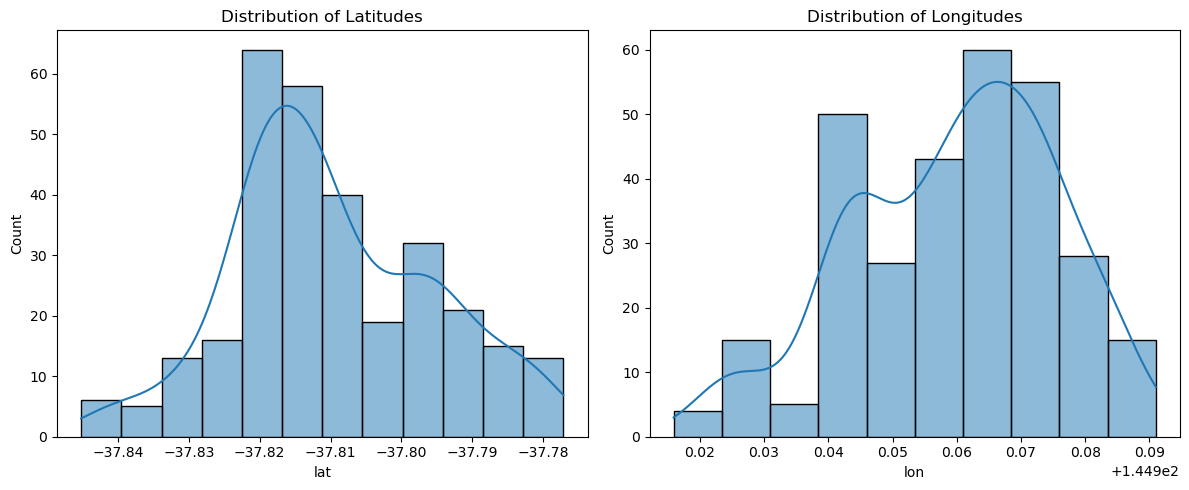

In [24]:
# 1. Distribution of latitudes and longitudes (unchanged)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(drinking_df['lat'], kde=True)
plt.title('Distribution of Latitudes')
plt.subplot(1, 2, 2)
sns.histplot(drinking_df['lon'], kde=True)
plt.title('Distribution of Longitudes')
plt.tight_layout()
plt.show()


This visualization shows the distributions of latitudes and longitudes for a set of locations. The latitude distribution is roughly normal, centered around -37.81 to -37.82. The longitude distribution is more irregular with multiple peaks, primarily between 144.06 and 144.07. Both distributions indicate a concentrated area with some spread in all directions.

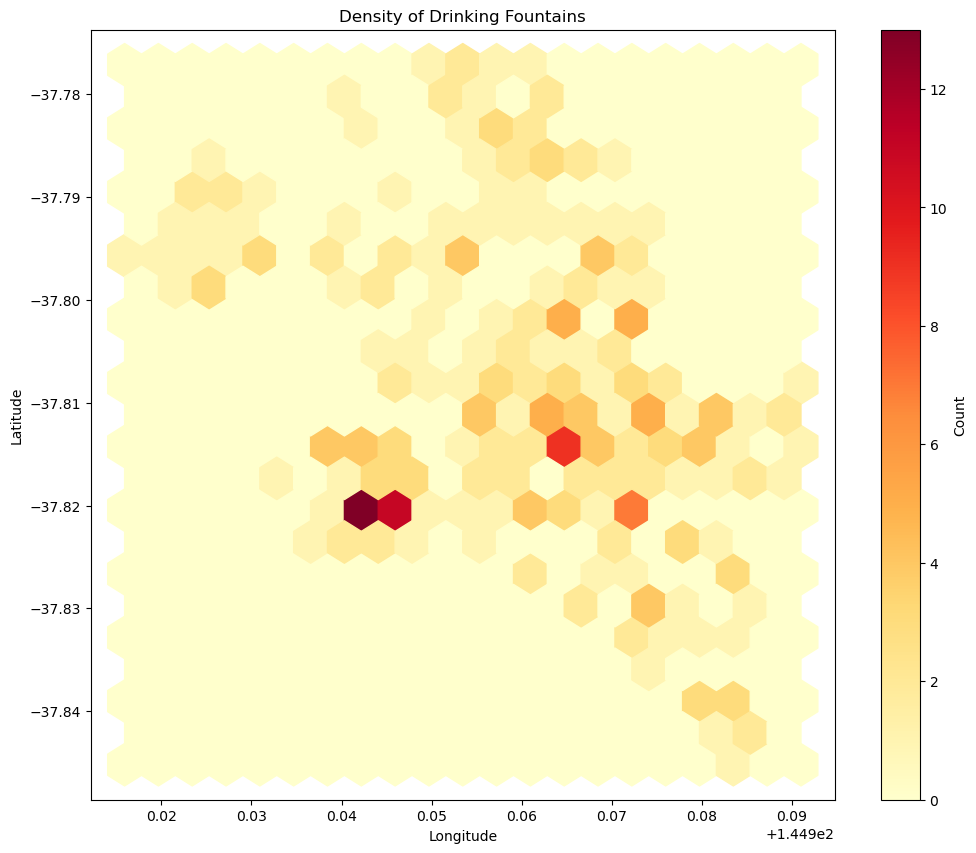

In [26]:
# 2. Scatter plot of fountain locations with hexbin (new)
plt.figure(figsize=(12, 10))
plt.hexbin(drinking_df['lon'], drinking_df['lat'], gridsize=20, cmap='YlOrRd')
plt.colorbar(label='Count')
plt.title('Density of Drinking Fountains')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This heatmap shows the density of drinking fountains across a geographical area. The highest concentration (darkest red) is around latitude -37.82 and longitude 144.04. There's another high-density area at -37.81 and 144.06. Most of the map is light yellow, indicating a sparse distribution of fountains across the region, with several moderate-density clusters visible.

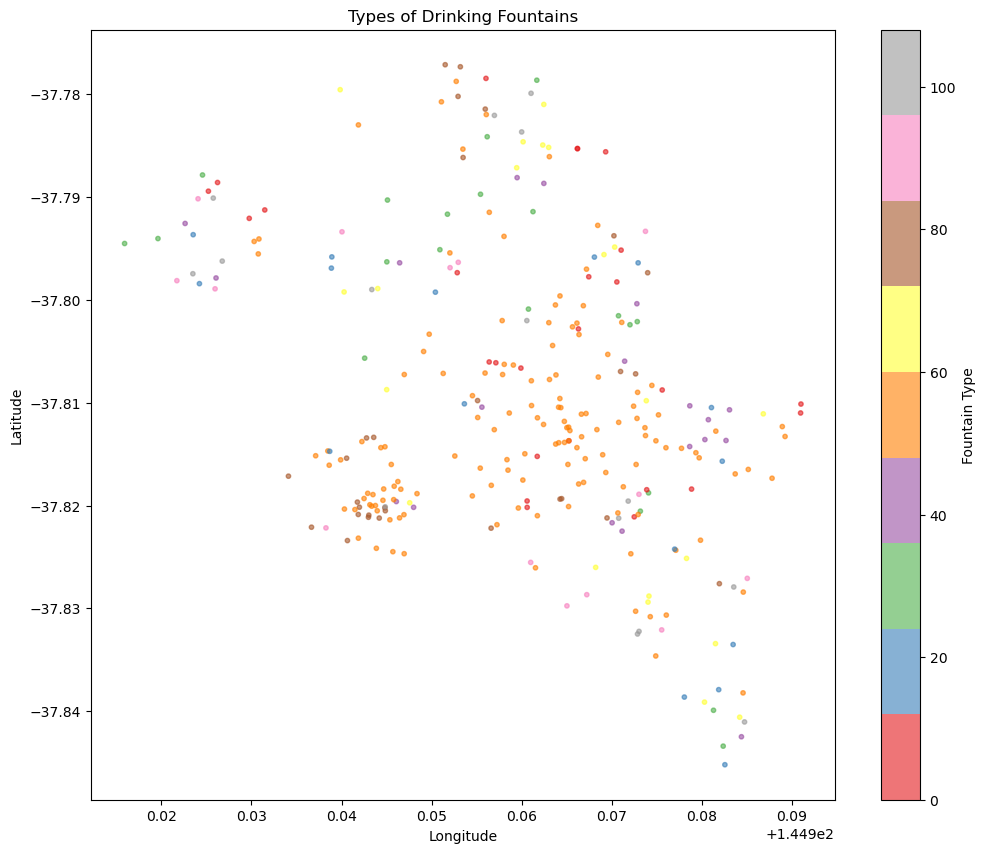

In [28]:
# 4. Scatter plot with fountain types
plt.figure(figsize=(12, 10))
scatter = plt.scatter(drinking_df['lon'], 
                      drinking_df['lat'],
                      c=drinking_df['description'].astype('category').cat.codes,
                      cmap='Set1',
                      s=10,
                      alpha=0.6)
plt.colorbar(scatter, label='Fountain Type')
plt.title('Types of Drinking Fountains')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


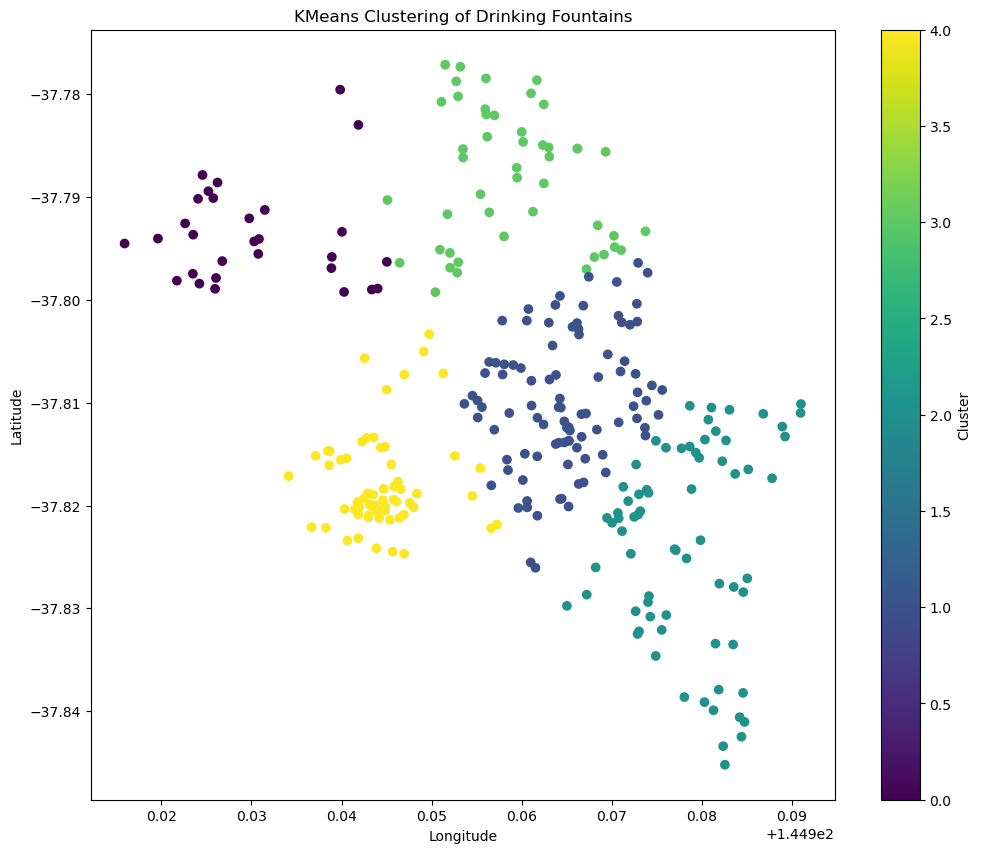

In [29]:
# 5. KMeans clustering visualization (new)
kmeans = KMeans(n_clusters=5, random_state=42)
drinking_df['Cluster'] = kmeans.fit_predict(drinking_df[['lat', 'lon']])

plt.figure(figsize=(12, 10))
scatter = plt.scatter(drinking_df['lon'], drinking_df['lat'], c=drinking_df['Cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('KMeans Clustering of Drinking Fountains')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This visualization presents a KMeans clustering analysis of drinking fountains across various locations, displayed based on latitude and longitude. Each dot represents a fountain, with different colors indicating the cluster to which it belongs. The clusters are numbered and shown on a color scale, helping identify spatial patterns and groupings of drinking fountains.

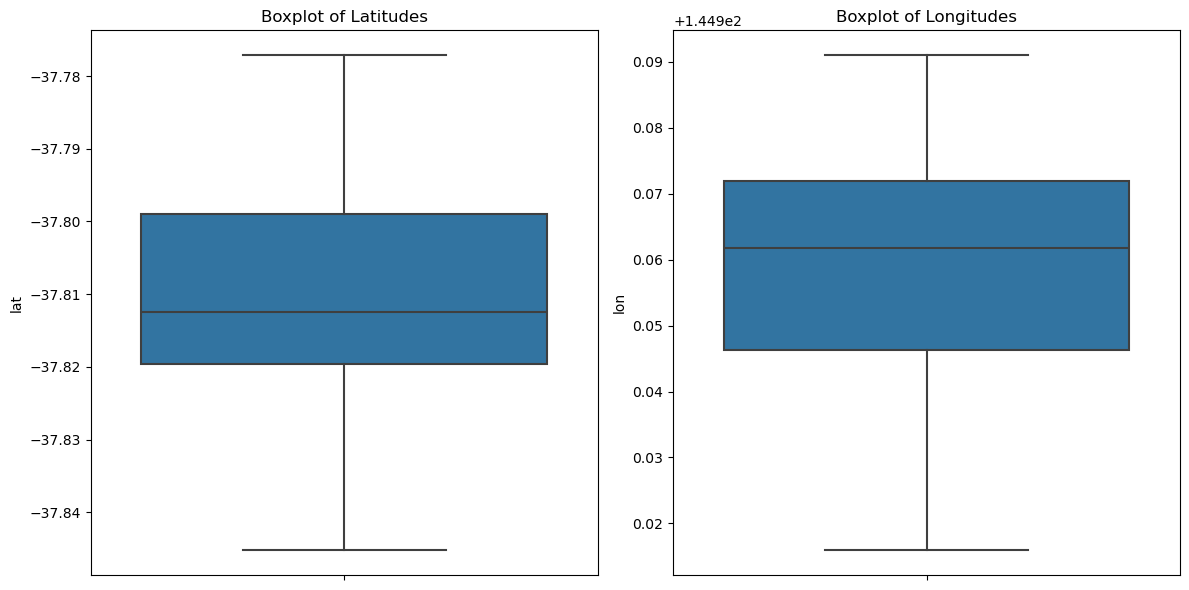

In [31]:
# 6. Box plot of latitudes and longitudes (new)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=drinking_df['lat'])
plt.title('Boxplot of Latitudes')
plt.subplot(1, 2, 2)
sns.boxplot(y=drinking_df['lon'])
plt.title('Boxplot of Longitudes')
plt.tight_layout()
plt.show()

This visualization shows boxplots for the latitudes and longitudes of drinking fountains in Melbourne. The left plot displays the distribution of latitude values, while the right plot represents longitude values. Both plots highlight the central tendencies, ranges, and potential outliers of the geographic locations of the fountains across the city.

In [33]:
# Additional analysis: Check for any correlation between latitude and longitude
correlation = drinking_df['lat'].corr(drinking_df['lon'])
print(f"\nCorrelation between latitude and longitude: {correlation:.2f}")



Correlation between latitude and longitude: -0.35


In [34]:
# Summary of findings
print("\nSummary of Findings:")
print(f"1. The latitude ranges from {drinking_df['lat'].min():.6f} to {drinking_df['lat'].max():.6f}")
print(f"2. The longitude ranges from {drinking_df['lon'].min():.6f} to {drinking_df['lon'].max():.6f}")
print(f"3. The correlation between latitude and longitude is {correlation:.2f}")


Summary of Findings:
1. The latitude ranges from -37.845214 to -37.777125
2. The longitude ranges from 144.915912 to 144.991006
3. The correlation between latitude and longitude is -0.35


Interactive map to visualize the drinking fountain locations

In [36]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Create a map centered on the mean coordinates of the fountains
center_lat = drinking_df['lat'].mean()
center_lon = drinking_df['lon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each drinking fountain
for idx, row in drinking_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['description'],
        tooltip=f"Fountain {idx}"
    ).add_to(marker_cluster)

# Display the map in the notebook
display(m)

In [37]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
import matplotlib.pyplot as plt


# Create a color map for fountain types
fountain_types = drinking_df['description'].unique()
color_map = plt.cm.get_cmap('tab20')  # This gives us 20 distinct colors
type_to_color = {t: f'#{int(color_map(i)[0]*255):02x}{int(color_map(i)[1]*255):02x}{int(color_map(i)[2]*255):02x}' 
                 for i, t in enumerate(fountain_types)}

# Create a map centered on the mean coordinates of the fountains
center_lat = drinking_df['lat'].mean()
center_lon = drinking_df['lon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create a MarkerCluster for each fountain type
fountain_layers = {}
for fountain_type in fountain_types:
    fountain_layers[fountain_type] = folium.FeatureGroup(name=fountain_type)

# Add markers for each drinking fountain
for idx, row in drinking_df.iterrows():
    marker = folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['description'],
        tooltip=f"Fountain {idx}",
        icon=folium.Icon(color='lightgray', icon_color=type_to_color[row['description']], icon='tint', prefix='fa')
    )
    marker.add_to(fountain_layers[row['description']])

# Add all layers to the map
for layer in fountain_layers.values():
    layer.add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Display the map in the notebook
display(m)

# Optionally, save the map
m.save("drinking_fountains_map_with_layer_control.html")

print("Map has been displayed above and saved as 'drinking_fountains_map_with_layer_control.html'.")

/var/folders/xh/3cc6bttd02zdcq4ppp7f3z3w0000gn/T/ipykernel_18218/3617667884.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20')  # This gives us 20 distinct colors


Map has been displayed above and saved as 'drinking_fountains_map_with_layer_control.html'.


This map visualizes the distribution of different types of drinking fountains in Melbourne using color-coded markers. Each marker represents a fountain, with distinct colors indicating varying fountain types. The map provides a geographic overview of fountain locations across the city, aiding in spatial analysis for public amenities.

Analyzing the patterns in Public toilets dataset

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Basic information about the dataset
print(toilets_df.info())
print("\nBasic statistics:")
print(toilets_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 73
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        73 non-null     object 
 1   female      73 non-null     int64  
 2   male        73 non-null     int64  
 3   wheelchair  73 non-null     int64  
 4   lat         73 non-null     float64
 5   lon         73 non-null     float64
 6   location    73 non-null     object 
dtypes: float64(2), int64(3), object(2)
memory usage: 4.6+ KB
None

Basic statistics:
          female       male  wheelchair        lat         lon
count  73.000000  73.000000   73.000000  73.000000   73.000000
mean    1.821918   1.917808    1.643836 -37.810780  144.961775
std     0.419738   0.322896    0.510171   0.014282    0.014911
min     0.000000   0.000000    0.000000 -37.845207  144.921106
25%     2.000000   2.000000    1.000000 -37.819406  144.955578
50%     2.000000   2.000000    2.000000 -37.812241  144.962923
75

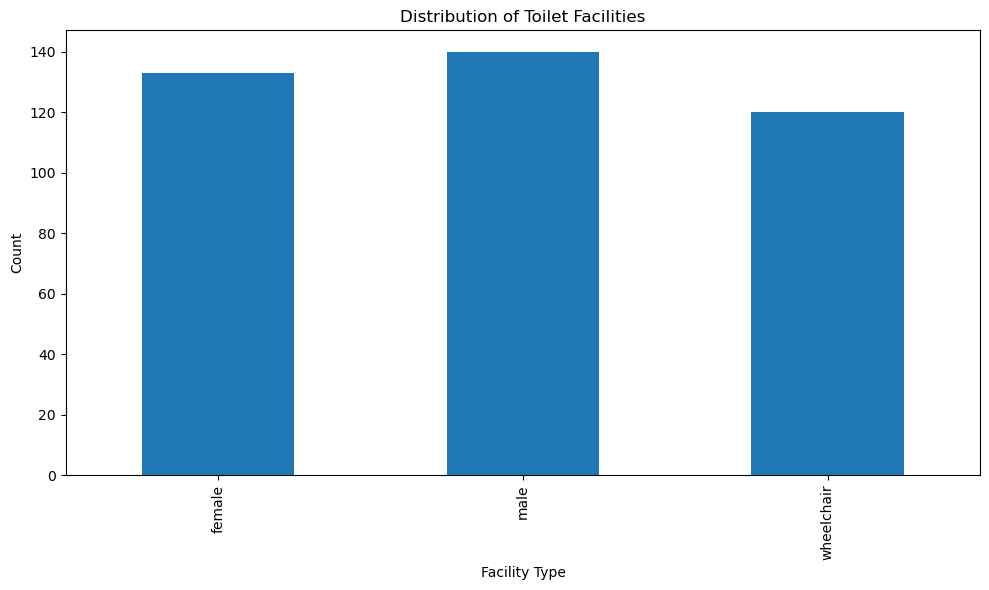

In [41]:
# Distribution of facilities
facility_cols = ['female', 'male', 'wheelchair']
facility_data = toilets_df[facility_cols].sum()
plt.figure(figsize=(10, 6))
facility_data.plot(kind='bar')
plt.title('Distribution of Toilet Facilities')
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

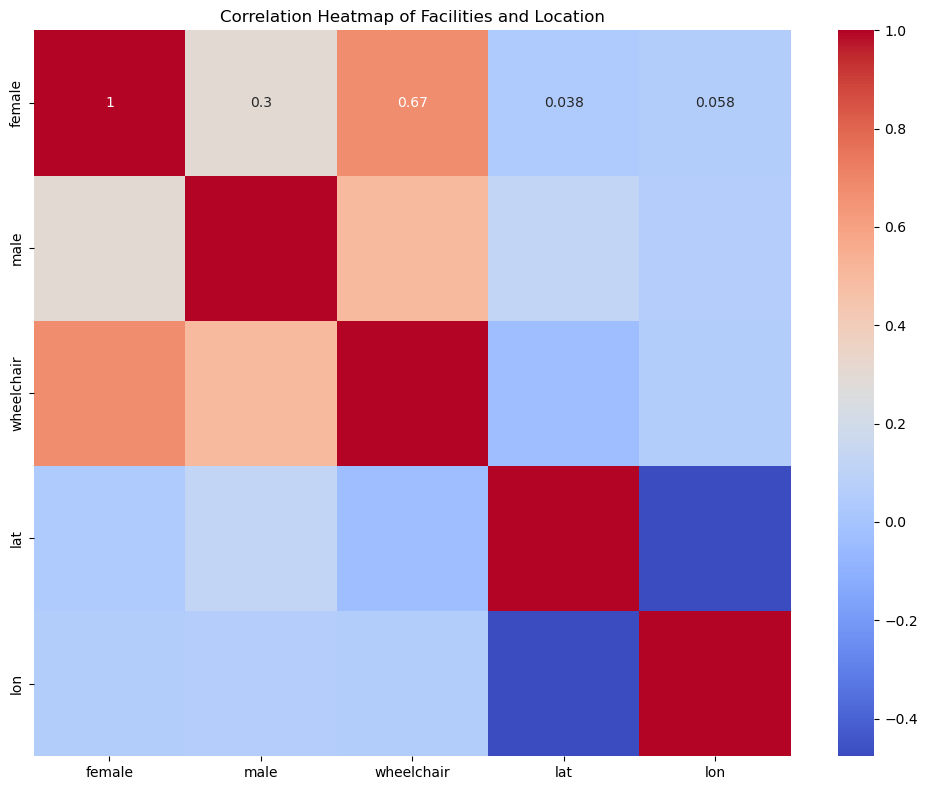

In [42]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(toilets_df[facility_cols + ['lat', 'lon']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Facilities and Location')
plt.tight_layout()
plt.show()

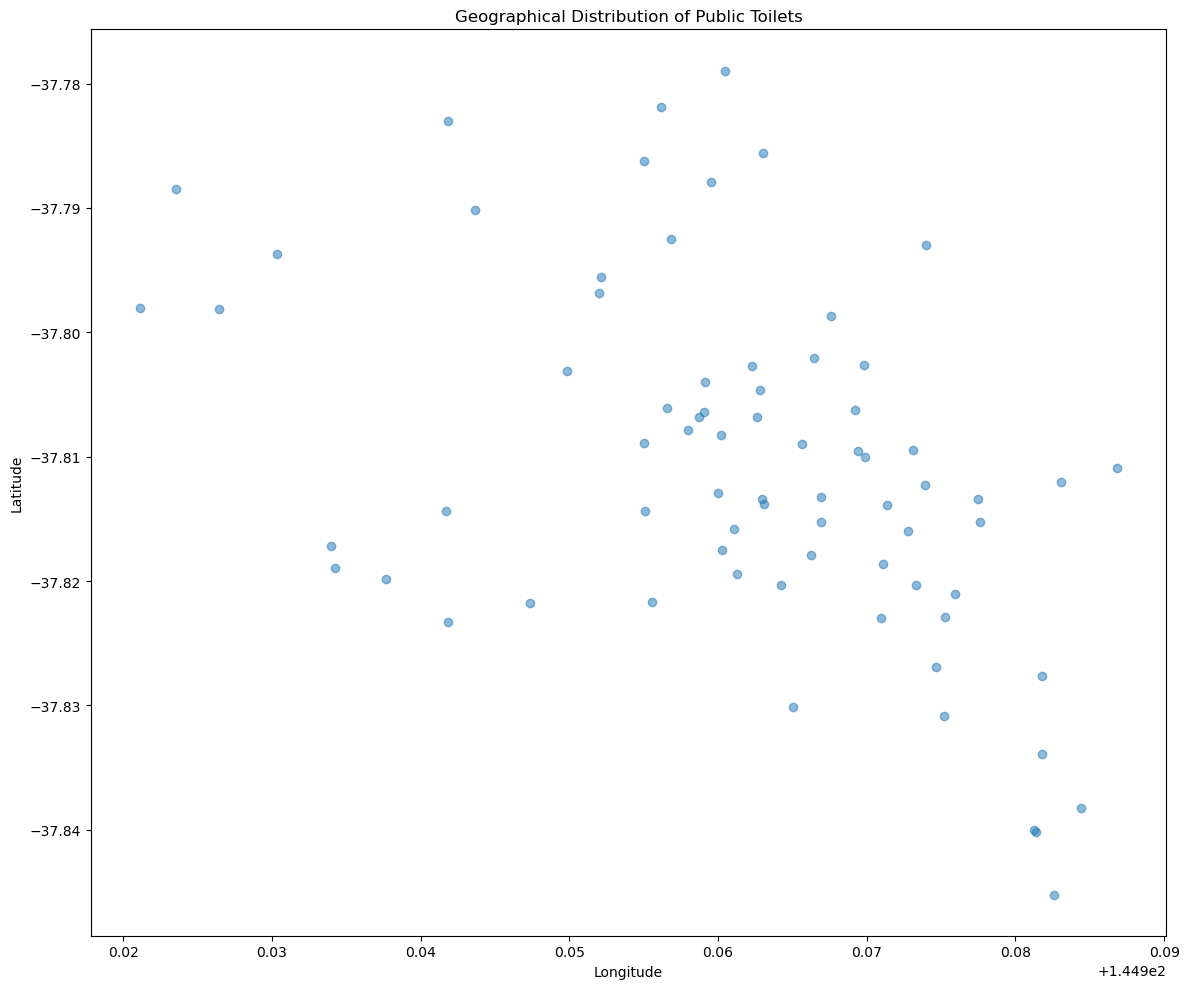

In [43]:
# Scatter plot of toilet locations
plt.figure(figsize=(12, 10))
plt.scatter(toilets_df['lon'], toilets_df['lat'], alpha=0.5)
plt.title('Geographical Distribution of Public Toilets')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

Interactive map to visualize the locations of public toilets

In [45]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from branca.colormap import LinearColormap
from IPython.display import display


# Function to determine toilet type based on facilities
def get_toilet_type(row):
    if row['wheelchair'] > 0:
        return 'Wheelchair Accessible'
    elif row['female'] > 0 and row['male'] > 0:
        return 'Both Male and Female'
    elif row['female'] > 0:
        return 'Female Only'
    elif row['male'] > 0:
        return 'Male Only'
    else:
        return 'Unknown'

# Add toilet type to the dataframe
toilets_df['toilet_type'] = toilets_df.apply(get_toilet_type, axis=1)

# Create a color map for toilet types
color_map = {
    'Wheelchair Accessible': 'green',
    'Both Male and Female': 'blue',
    'Female Only': 'pink',
    'Male Only': 'orange',
    'Unknown': 'gray'
}

# Create the map
m = folium.Map(location=[toilets_df['lat'].mean(), toilets_df['lon'].mean()], zoom_start=12)

# Add markers for each toilet
for idx, row in toilets_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Name: {row['name']}<br>Female: {row['female']}<br>Male: {row['male']}<br>Wheelchair: {row['wheelchair']}",
        tooltip=f"Toilet {idx}",
        icon=folium.Icon(color=color_map[row['toilet_type']], icon='info-sign')
    ).add_to(m)

# Add legend
legend_html = '''
    <div style="position: fixed; bottom: 50px; left: 50px; width: 220px; height: 120px; 
                border:2px solid grey; z-index:9999; font-size:14px; background-color:white;
                ">&nbsp;<b>Toilet Types</b><br>
    '''
for toilet_type, color in color_map.items():
    legend_html += f'&nbsp;<i class="fa fa-map-marker fa-1x" style="color:{color}"></i>&nbsp;{toilet_type}<br>'
legend_html += '</div>'
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
display(m)

# Save the map
m.save("public_toilets_map_with_legend.html")
print("Interactive map with legend saved as 'public_toilets_map_with_legend.html'")

Interactive map with legend saved as 'public_toilets_map_with_legend.html'


In [46]:
# Additional analysis
print("\nSummary Statistics:")
print(f"Total number of public toilets: {len(toilets_df)}")
print(f"Average number of female facilities per toilet: {toilets_df['female'].mean():.2f}")
print(f"Average number of male facilities per toilet: {toilets_df['male'].mean():.2f}")
print(f"Percentage of wheelchair accessible toilets: {(toilets_df['wheelchair'] > 0).mean() * 100:.2f}%")


Summary Statistics:
Total number of public toilets: 73
Average number of female facilities per toilet: 1.82
Average number of male facilities per toilet: 1.92
Percentage of wheelchair accessible toilets: 98.63%


Analyzing the patterns in Pedestrian counting system dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850393 entries, 0 to 1850392
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               int64 
 1   location_id      int64 
 2   sensing_date     object
 3   hourday          int64 
 4   direction_1      int64 
 5   direction_2      int64 
 6   pedestriancount  int64 
 7   sensor_name      object
 8   location         object
dtypes: int64(6), object(3)
memory usage: 127.1+ MB
None

Basic statistics:
                 id   location_id       hourday   direction_1   direction_2  \
count  1.850393e+06  1.850393e+06  1.850393e+06  1.850393e+06  1.850393e+06   
mean   3.362545e+11  5.130208e+01  1.176951e+01  1.820126e+02  1.842039e+02   
std    3.500810e+11  3.359033e+01  6.816831e+00  2.856670e+02  2.908225e+02   
min    1.020211e+09  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.202023e+10  2.500000e+01  6.000000e+00  1.800000e+01  1.900000e+01   
50%    1.822202e+11

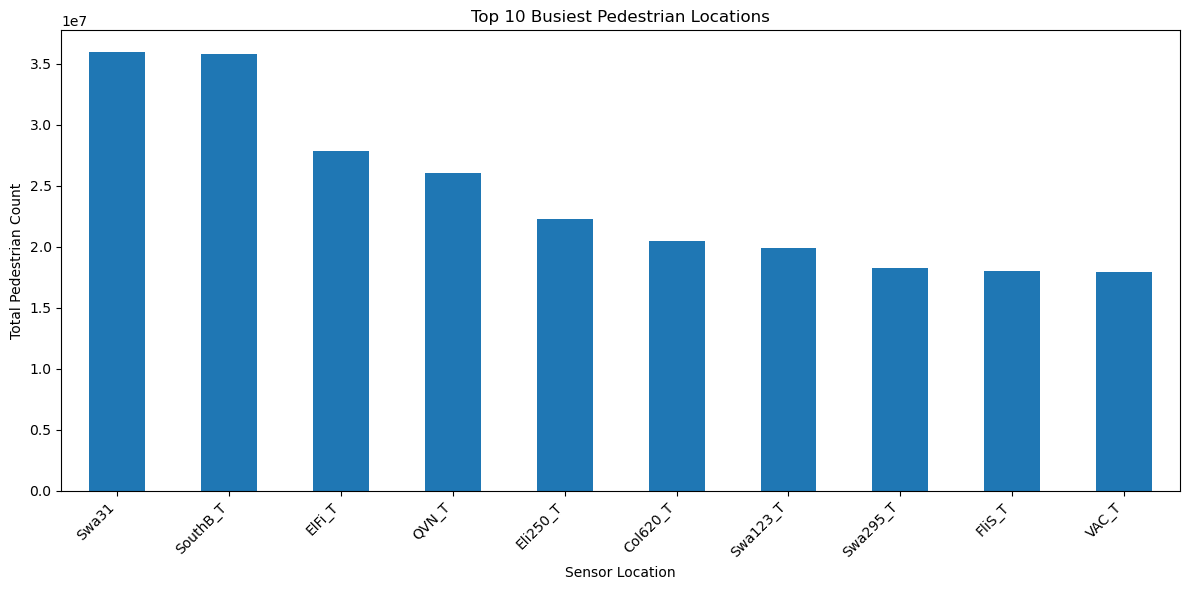

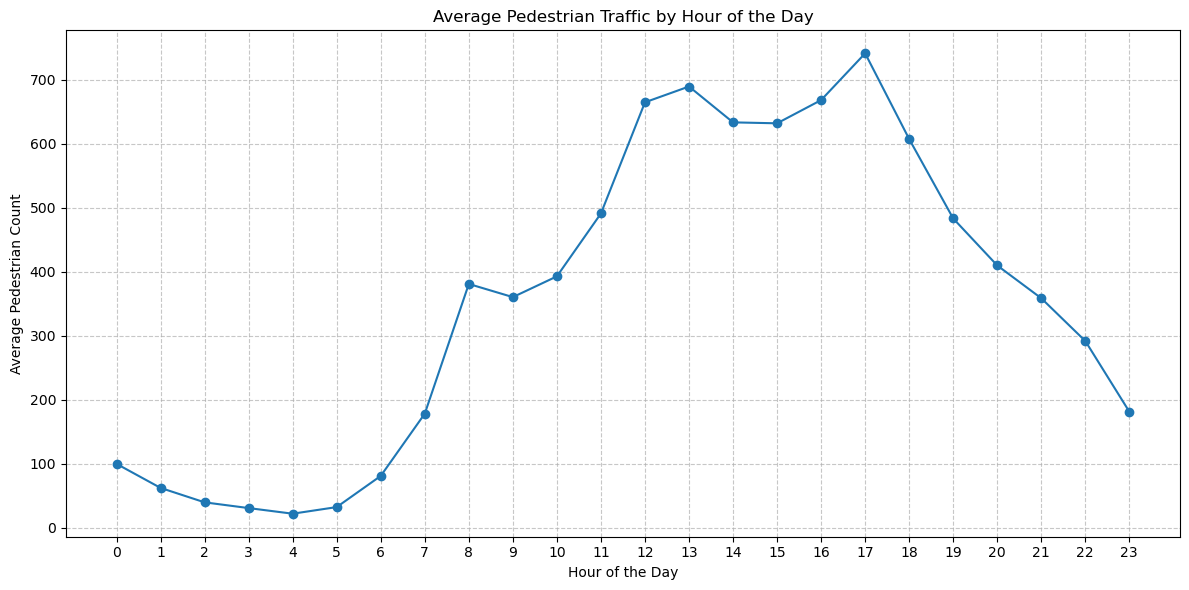

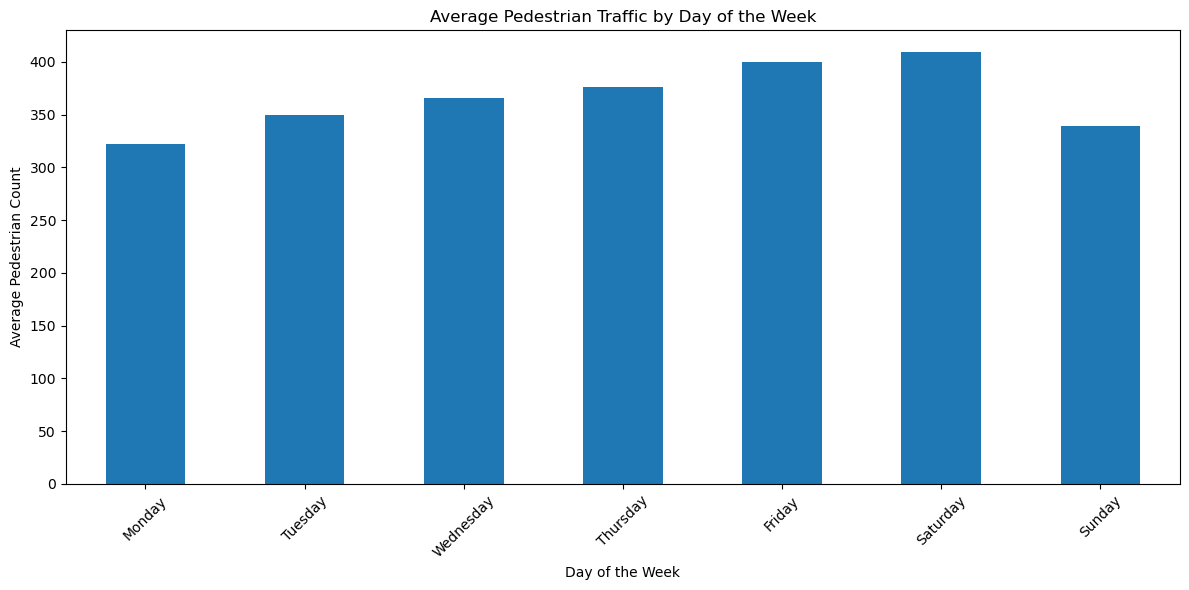


Heatmap of pedestrian traffic saved as 'pedestrian_heatmap.html'


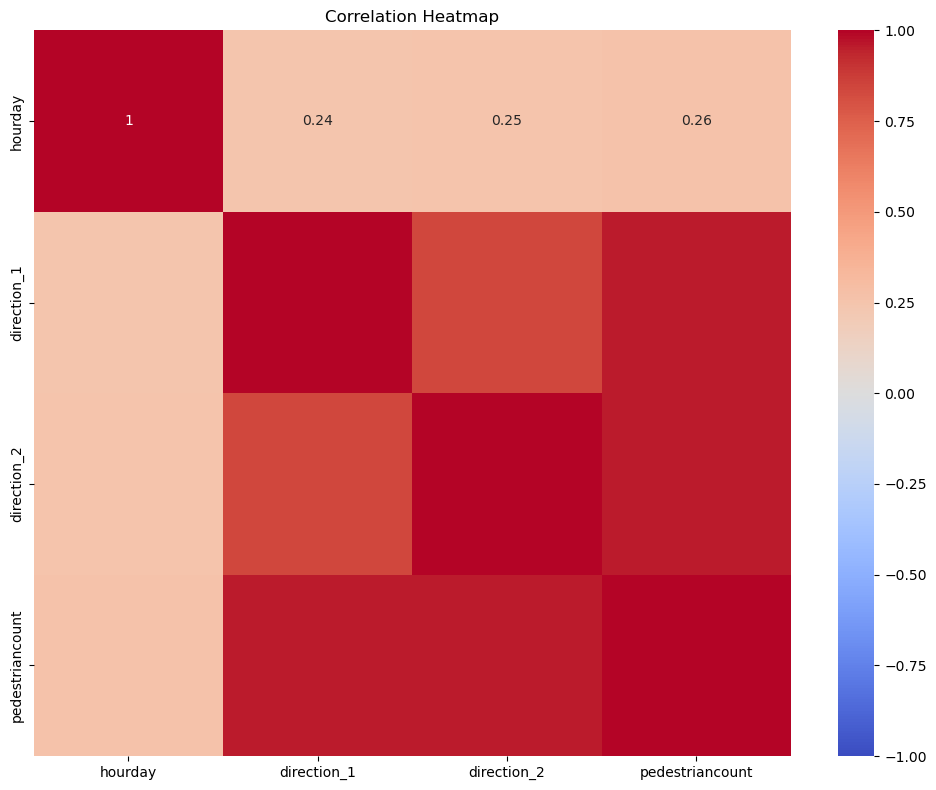

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

# Basic information about the dataset
print(pedestrian_df.info())
print("\nBasic statistics:")
print(pedestrian_df.describe())

# Convert sensing_date to datetime
pedestrian_df['sensing_date'] = pd.to_datetime(pedestrian_df['sensing_date'])

# Aggregate data by location
location_traffic = pedestrian_df.groupby('sensor_name')['pedestriancount'].sum().sort_values(ascending=False)

# Top 10 busiest locations
print("\nTop 10 busiest locations:")
print(location_traffic.head(10))

# Visualize top 10 busiest locations
plt.figure(figsize=(12, 6))
location_traffic.head(10).plot(kind='bar')
plt.title('Top 10 Busiest Pedestrian Locations')
plt.xlabel('Sensor Location')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze pedestrian traffic by hour of the day
pedestrian_df['hour'] = pedestrian_df['hourday']
hourly_traffic = pedestrian_df.groupby('hour')['pedestriancount'].mean()

plt.figure(figsize=(12, 6))
hourly_traffic.plot(kind='line', marker='o')
plt.title('Average Pedestrian Traffic by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Pedestrian Count')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze pedestrian traffic by day of the week
pedestrian_df['day_of_week'] = pedestrian_df['sensing_date'].dt.day_name()
daily_traffic = pedestrian_df.groupby('day_of_week')['pedestriancount'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic = daily_traffic.reindex(day_order)

plt.figure(figsize=(12, 6))
daily_traffic.plot(kind='bar')
plt.title('Average Pedestrian Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a heatmap of pedestrian traffic
location_avg_traffic = pedestrian_df.groupby('location').agg({
    'pedestriancount': 'mean',
    'location': lambda x: x.iloc[0]
}).reset_index(drop=True)

location_avg_traffic[['lat', 'lon']] = location_avg_traffic['location'].str.split(',', expand=True).astype(float)

m = folium.Map(location=[location_avg_traffic['lat'].mean(), location_avg_traffic['lon'].mean()], zoom_start=13)

HeatMap(data=location_avg_traffic[['lat', 'lon', 'pedestriancount']].values.tolist(), 
        radius=15, 
        max_zoom=1,
        blur=10).add_to(m)

m.save("pedestrian_heatmap.html")
print("\nHeatmap of pedestrian traffic saved as 'pedestrian_heatmap.html'")

# Correlation analysis
correlation_matrix = pedestrian_df[['hourday', 'direction_1', 'direction_2', 'pedestriancount']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Creating ML models to predict optimal locations requiring amenities - RandomForest Model

Mean Squared Error: 268.7418778190117
R-squared Score: 0.9923261218584214

Feature Importance:
            feature  importance
0   pedestriancount    0.964416
1              hour    0.017264
2       day_of_week    0.008938
4  nearest_fountain    0.004719
3    nearest_toilet    0.004662

Amenity Score Threshold (75th percentile): 481.47963908573684
Toilet Distance Threshold (75th percentile): 0.2560531859384019
Fountain Distance Threshold (75th percentile): 0.11532691549776869



Number of suggested new amenity locations: 9

Top 10 suggested locations:
          lat         lon  pedestriancount  nearest_toilet  nearest_fountain  \
34 -37.816686  144.966897      1643.345042        0.146290          0.118419   
65 -37.811015  144.964295       823.337590        0.259405          0.059742   
20 -37.818742  144.967877       765.821333        0.169608          0.141159   
18 -37.818880  144.954492       730.121387        0.330001          0.021059   
1  -37.824018  144.956044       655.488944        0.258684          0.207750   
4  -37.821299  144.968793       648.123098        0.265917          0.060531   
41 -37.815314  144.952278       635.406338        0.271763          0.029975   
13 -37.819707  144.967957       497.025030        0.249738          0.213579   
32 -37.816861  144.953581       519.712111        0.310572          0.168983   

    amenity_score  
34    1391.876404  
65     822.576653  
20     784.539335  
18     754.218706  
1      657.907574  
4   

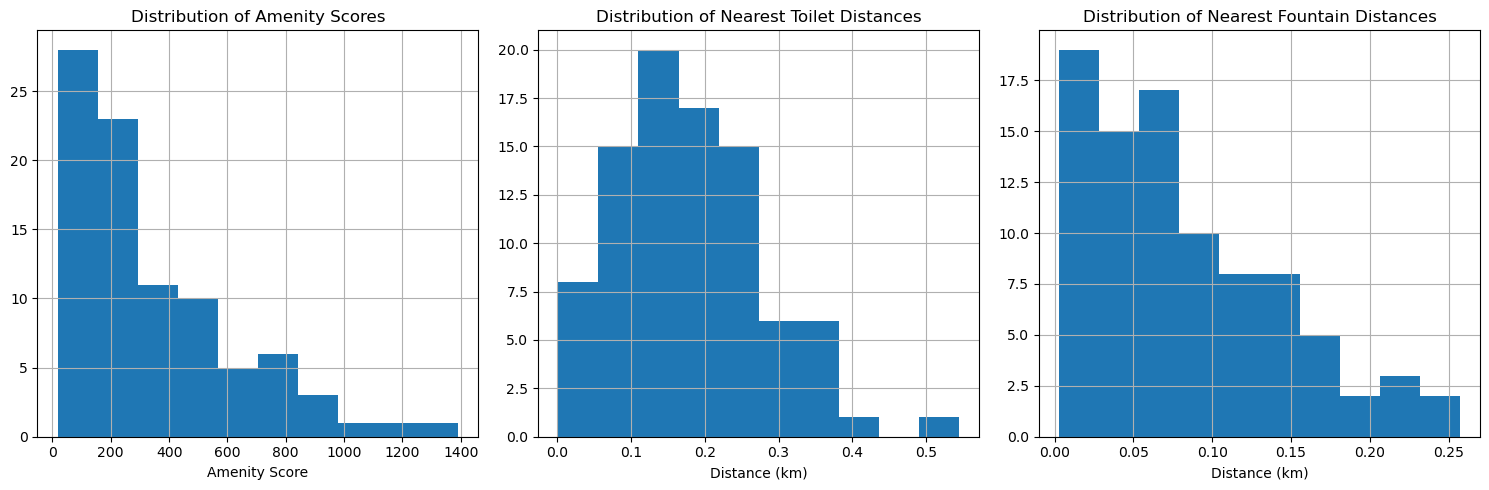

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import folium
from folium.plugins import HeatMap, MarkerCluster
from IPython.display import display

# Preprocess pedestrian data
pedestrian_df['sensing_date'] = pd.to_datetime(pedestrian_df['sensing_date'])
pedestrian_df['hour'] = pedestrian_df['hourday']
pedestrian_df['day_of_week'] = pedestrian_df['sensing_date'].dt.dayofweek

# Extract lat and lon from location column for pedestrian data
pedestrian_df[['lat', 'lon']] = pedestrian_df['location'].str.split(',', expand=True).astype(float)

# Aggregate pedestrian data by location
location_traffic = pedestrian_df.groupby(['lat', 'lon']).agg({
    'pedestriancount': 'mean',
    'hour': 'mean',
    'day_of_week': 'mean'
}).reset_index()

# Function to calculate distance between two points
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# Calculate distance to nearest toilet and drinking fountain for each pedestrian location
def calculate_nearest_amenity(row, amenity_df):
    distances = amenity_df.apply(lambda x: haversine_distance(row['lat'], row['lon'], x['lat'], x['lon']), axis=1)
    return distances.min()

location_traffic['nearest_toilet'] = location_traffic.apply(lambda row: calculate_nearest_amenity(row, toilets_df), axis=1)
location_traffic['nearest_fountain'] = location_traffic.apply(lambda row: calculate_nearest_amenity(row, drinking_df), axis=1)

# Prepare features for the model
features = ['pedestriancount', 'hour', 'day_of_week', 'nearest_toilet', 'nearest_fountain']
X = location_traffic[features]
y = location_traffic['pedestriancount']  # We'll predict pedestrian count as a proxy for amenity need

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Calculate amenity scores
location_traffic['amenity_score'] = rf_model.predict(scaler.transform(location_traffic[features]))

# Calculate percentiles for amenity score and distances
amenity_score_threshold = location_traffic['amenity_score'].quantile(0.75)
toilet_distance_threshold = location_traffic['nearest_toilet'].quantile(0.75)
fountain_distance_threshold = location_traffic['nearest_fountain'].quantile(0.75)

print(f"\nAmenity Score Threshold (75th percentile): {amenity_score_threshold}")
print(f"Toilet Distance Threshold (75th percentile): {toilet_distance_threshold}")
print(f"Fountain Distance Threshold (75th percentile): {fountain_distance_threshold}")

# Identify high-traffic areas with insufficient amenities (adjusted criteria)
location_traffic['needs_amenity'] = (
    (location_traffic['amenity_score'] > amenity_score_threshold) &
    ((location_traffic['nearest_toilet'] > toilet_distance_threshold) |
     (location_traffic['nearest_fountain'] > fountain_distance_threshold))
)

# Create the map
m = folium.Map(location=[location_traffic['lat'].mean(), location_traffic['lon'].mean()], zoom_start=13)

# Add heatmap of pedestrian traffic
HeatMap(data=location_traffic[['lat', 'lon', 'pedestriancount']].values.tolist(), 
        radius=15, max_zoom=1, blur=10, name="Pedestrian Traffic Heatmap").add_to(m)

# Add markers for existing toilets
toilets_cluster = MarkerCluster(name="Existing Toilets").add_to(m)
for _, row in toilets_df.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                  popup=f"Toilet<br>Female: {row['female']}<br>Male: {row['male']}<br>Wheelchair: {row['wheelchair']}", 
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(toilets_cluster)

# Add markers for existing drinking fountains
fountains_cluster = MarkerCluster(name="Existing Drinking Fountains").add_to(m)
for _, row in drinking_df.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                  popup=f"Drinking Fountain<br>{row['description']}", 
                  icon=folium.Icon(color='green', icon='tint')).add_to(fountains_cluster)

# Add markers for suggested new amenity locations
new_amenities = location_traffic[location_traffic['needs_amenity']]
new_amenities_cluster = MarkerCluster(name="Suggested New Amenities").add_to(m)
for _, row in new_amenities.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                  popup=f"Suggested New Amenity<br>Pedestrian Count: {row['pedestriancount']:.2f}<br>Amenity Score: {row['amenity_score']:.2f}<br>Nearest Toilet: {row['nearest_toilet']:.2f} km<br>Nearest Fountain: {row['nearest_fountain']:.2f} km", 
                  icon=folium.Icon(color='red', icon='star')).add_to(new_amenities_cluster)

# Add layer control
folium.LayerControl().add_to(m)

# Add a legend
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 220px; height: 160px; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color: white;
                opacity: 0.8;
                ">
    <p style="margin-left: 10px; margin-top: 5px;"><strong>Legend</strong></p>
    <p style="margin-left: 10px; line-height: 20px;">
    <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Existing Toilets<br>
    <i class="fa fa-map-marker fa-2x" style="color:green"></i> Existing Drinking Fountains<br>
    <i class="fa fa-map-marker fa-2x" style="color:red"></i> Suggested New Amenities<br>
    <i class="fa fa-fire fa-2x" style="color:orange"></i> Pedestrian Traffic Heatmap
    </p>
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map in the notebook
display(m)

# Print summary of suggested new amenities
print(f"\nNumber of suggested new amenity locations: {len(new_amenities)}")
print("\nTop 10 suggested locations:")
print(new_amenities.sort_values('amenity_score', ascending=False)[['lat', 'lon', 'pedestriancount', 'nearest_toilet', 'nearest_fountain', 'amenity_score']].head(10))

# Additional diagnostics
print("\nDistribution of amenity scores:")
print(location_traffic['amenity_score'].describe())

print("\nDistribution of nearest toilet distances:")
print(location_traffic['nearest_toilet'].describe())

print("\nDistribution of nearest fountain distances:")
print(location_traffic['nearest_fountain'].describe())

# Plot histograms for better visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
location_traffic['amenity_score'].hist()
plt.title('Distribution of Amenity Scores')
plt.xlabel('Amenity Score')

plt.subplot(1, 3, 2)
location_traffic['nearest_toilet'].hist()
plt.title('Distribution of Nearest Toilet Distances')
plt.xlabel('Distance (km)')

plt.subplot(1, 3, 3)
location_traffic['nearest_fountain'].hist()
plt.title('Distribution of Nearest Fountain Distances')
plt.xlabel('Distance (km)')

plt.tight_layout()
plt.show()

In [51]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Filter for locations that need amenities
new_amenities = location_traffic[location_traffic['needs_amenity']]

# Sort by amenity score (which represents the need for an amenity) in descending order
new_amenities_sorted = new_amenities.sort_values('amenity_score', ascending=False)

# Create a function to get the nearest sensor name for a given lat/lon
def get_nearest_sensor(lat, lon):
    distances = pedestrian_df.apply(lambda row: haversine_distance(lat, lon, row['lat'], row['lon']), axis=1)
    nearest_index = distances.idxmin()
    return pedestrian_df.loc[nearest_index, 'sensor_name']

# Add nearest sensor name to each location
new_amenities_sorted['nearest_sensor'] = new_amenities_sorted.apply(
    lambda row: get_nearest_sensor(row['lat'], row['lon']), axis=1
)

# Print the results
print("Locations Needing New Amenities (sorted by priority):")
for i, row in new_amenities_sorted.iterrows():
    print(f"\n{i+1}. Near {row['nearest_sensor']}:")
    print(f"   Coordinates: ({row['lat']:.6f}, {row['lon']:.6f})")
    print(f"   Average Daily Foot Traffic: {row['pedestriancount']:.0f}")
    print(f"   Distance to Nearest Toilet: {row['nearest_toilet']:.3f} km")
    print(f"   Distance to Nearest Drinking Fountain: {row['nearest_fountain']:.3f} km")
    print(f"   Amenity Score: {row['amenity_score']:.2f}")

# Create a map to visualize these locations
m = folium.Map(location=[new_amenities_sorted['lat'].mean(), new_amenities_sorted['lon'].mean()], zoom_start=14)

# Add markers for suggested new amenity locations
for _, row in new_amenities_sorted.iterrows():
    folium.Marker(
        [row['lat'], row['lon']],
        popup=f"Suggested New Amenity<br>"
              f"Near: {row['nearest_sensor']}<br>"
              f"Foot Traffic: {row['pedestriancount']:.0f}<br>"
              f"Nearest Toilet: {row['nearest_toilet']:.3f} km<br>"
              f"Nearest Fountain: {row['nearest_fountain']:.3f} km<br>"
              f"Amenity Score: {row['amenity_score']:.2f}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Add existing toilets and drinking fountains for context
toilets_cluster = MarkerCluster(name="Existing Toilets").add_to(m)
for _, row in toilets_df.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                  popup=f"Toilet<br>Female: {row['female']}<br>Male: {row['male']}<br>Wheelchair: {row['wheelchair']}", 
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(toilets_cluster)

fountains_cluster = MarkerCluster(name="Existing Drinking Fountains").add_to(m)
for _, row in drinking_df.iterrows():
    folium.Marker([row['lat'], row['lon']], 
                  popup=f"Drinking Fountain<br>{row['description']}", 
                  icon=folium.Icon(color='green', icon='tint')).add_to(fountains_cluster)

# Add layer control and legend
folium.LayerControl().add_to(m)
legend_html = '''
    <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 160px; 
                border:2px solid grey; z-index:9999; font-size:14px; background-color:white;">
        <p style="margin-left: 10px;"><strong>Legend</strong></p>
        <p style="margin-left: 10px; line-height: 20px;">
            <i class="fa fa-map-marker fa-2x" style="color:red"></i> Suggested New Amenities<br>
            <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Existing Toilets<br>
            <i class="fa fa-map-marker fa-2x" style="color:green"></i> Existing Fountains
        </p>
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
display(m)

Locations Needing New Amenities (sorted by priority):

35. Near Swa31:
   Coordinates: (-37.816686, 144.966897)
   Average Daily Foot Traffic: 1643
   Distance to Nearest Toilet: 0.146 km
   Distance to Nearest Drinking Fountain: 0.118 km
   Amenity Score: 1391.88

66. Near Swa295_T:
   Coordinates: (-37.811015, 144.964295)
   Average Daily Foot Traffic: 823
   Distance to Nearest Toilet: 0.259 km
   Distance to Nearest Drinking Fountain: 0.060 km
   Amenity Score: 822.58

21. Near PriNW_T:
   Coordinates: (-37.818742, 144.967877)
   Average Daily Foot Traffic: 766
   Distance to Nearest Toilet: 0.170 km
   Distance to Nearest Drinking Fountain: 0.141 km
   Amenity Score: 784.54

19. Near Col620_T:
   Coordinates: (-37.818880, 144.954492)
   Average Daily Foot Traffic: 730
   Distance to Nearest Toilet: 0.330 km
   Distance to Nearest Drinking Fountain: 0.021 km
   Amenity Score: 754.22

2. Near MCEC_T:
   Coordinates: (-37.824018, 144.956044)
   Average Daily Foot Traffic: 655
   Dist

This interactive map clearly shows the top locations requiring amenities along with the locations for the existing amenities.

**Conclusion Report: Optimal Locations for New Public Amenities in Melbourne**

## Executive Summary

This report presents the findings of a data-driven analysis to identify optimal locations for new public amenities (toilets and drinking fountains) in Melbourne. By analyzing pedestrian traffic data and the current distribution of existing amenities, we have identified nine high-priority locations that would benefit from new public facilities.

## Key Findings

1. **High-Traffic Areas**: Our analysis revealed several high-foot-traffic areas that are currently underserved by public amenities. The top location (near Swa31) sees an average daily foot traffic of 1,643 pedestrians.

2. **Amenity Gaps**: Despite the presence of existing facilities, we identified areas where the distance to the nearest toilet or drinking fountain is significant, indicating potential gaps in amenity coverage.

3. **Priority Locations**: The analysis highlighted nine specific locations that should be prioritized for new amenities, based on a combination of high foot traffic and distance from existing facilities.

## Detailed Recommendations

Based on our analysis, we recommend considering the following locations for new public amenities, listed in order of priority:

1. **Near Swa31** (-37.816686, 144.966897)
   - Highest foot traffic (1,643 daily average)
   - Moderate distance to existing amenities (146m to nearest toilet, 118m to nearest fountain)

2. **Near Swa295_T** (-37.811015, 144.964295)
   - High foot traffic (823 daily average)
   - Relatively far from nearest toilet (259m)

3. **Near PriNW_T** (-37.818742, 144.967877)
   - Significant foot traffic (766 daily average)
   - Moderate distances to existing amenities

4. **Near Col620_T** (-37.818880, 144.954492)
   - High foot traffic (730 daily average)
   - Farthest from existing toilets among top locations (330m)

5. **Near MCEC_T** (-37.824018, 144.956044)
   - Consistent high foot traffic (655 daily average)
   - Balanced distances to both toilets and fountains

The remaining four locations (near VAC_T, Spen229_T, Hammer1584_T, and Bou688_T) also show significant need for new amenities, with daily foot traffic ranging from 497 to 648 pedestrians.

## Implementation Considerations

1. **Type of Amenity**: For each location, consider whether a toilet, a drinking fountain, or a combined facility would be most appropriate based on the specific distances to existing amenities.

2. **Accessibility**: Ensure that any new facilities are accessible to all, including those with disabilities.

3. **Environmental Impact**: Consider sustainable and eco-friendly designs for new amenities to align with Melbourne's environmental goals.

4. **Public Feedback**: Before finalizing locations, it may be beneficial to gather public input, especially from frequent users of these high-traffic areas.

5. **Budget Allocation**: Prioritize the top locations if budget constraints prevent implementing all recommendations simultaneously.

## Long-Term Strategy

1. **Regular Updates**: Conduct this analysis periodically (e.g., annually) to account for changes in pedestrian patterns and new developments in the city.

2. **Expand Analysis**: Consider incorporating additional data sources such as tourist hotspots, event locations, or demographic information to further refine recommendations.

3. **Performance Monitoring**: After implementing new amenities, monitor their usage and impact on pedestrian satisfaction to inform future decision-making.

## Conclusion

This data-driven approach has identified specific, high-impact locations for new public amenities in Melbourne. By addressing these gaps in amenity coverage, the city can significantly improve the urban experience for pedestrians, potentially increasing foot traffic and enhancing the overall livability of these areas. I recommend using this analysis as a starting point for a targeted expansion of public amenities, always in conjunction with on-the-ground assessments and community feedback.